In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /home/ecotner/neural_tsp/neural_tsp/oneshot/

/home/ecotner/neural_tsp/neural_tsp/oneshot


In [5]:
import datetime as dt

import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from neural_tsp.oneshot.train import train
from neural_tsp.libs.environment import TSPEnvironment
from neural_tsp.oneshot.model import PolicyNetwork, QNetwork

In [6]:
train(run_for=20, lr=3e-10)

Episode 100; loss: 4.950024127960205; Q-value: -53.630653381347656; reward: -51.40578842163086
Episode 200; loss: 4.101380348205566; Q-value: -25.581457138061523; reward: -23.556270599365234
Episode 300; loss: 391.1424255371094; Q-value: -27.787635803222656; reward: -47.56495666503906
Episode 400; loss: 19.874021530151367; Q-value: -24.480314254760742; reward: -28.938343048095703


In [7]:
train_df = pd.read_csv("train.log")
train_df.head()

,loss,reward,q_value
0,1136.813599,-54.122887,-20.406218
1,24.242882,-25.500275,-20.576569
2,8034.495117,-88.700699,0.934650
3,192.646957,-35.600529,-21.720797
4,4302.397949,-86.631264,-21.038597


In [8]:
ma = train_df.ewm(alpha=1e-2).mean()

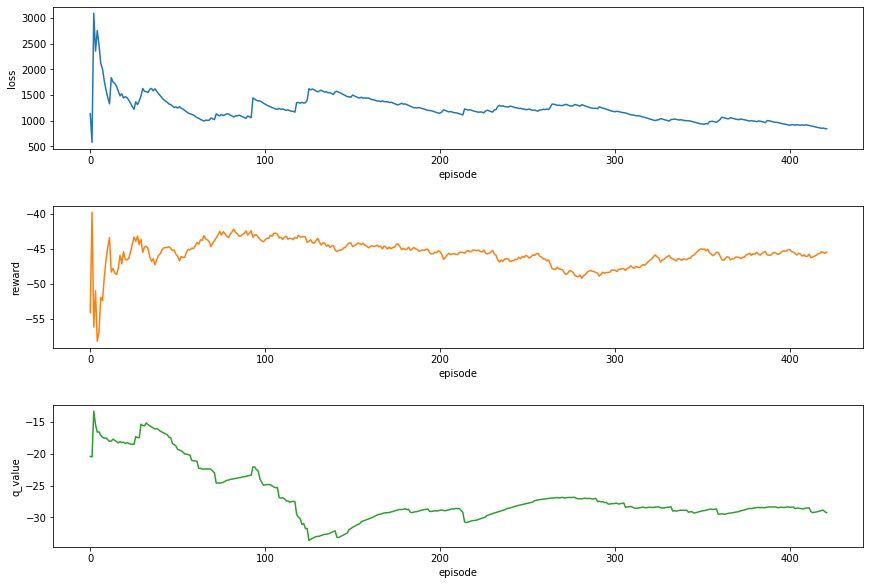

In [9]:
fig, axes = plt.subplots(nrows=3)

for i, label in enumerate(ma.columns):
    axes[i].plot(ma[label], label=label, color=f"C{i}")
    axes[i].set(xlabel="episode", ylabel=label)
plt.subplots_adjust(right=2, top=2, hspace=0.4)
plt.show()

In [18]:
policy = PolicyNetwork()
Q = QNetwork()
env = TSPEnvironment((5, 10))

In [19]:
policy.load_state_dict(torch.load("actor_model.torch"))
Q.load_state_dict(torch.load("critic_model.torch"))

&lt;All keys matched successfully&gt;

In [20]:
policy

PolicyNetwork(
  (conv1): NodeToNode()
  (conv2): NodeToNode()
  (conv3): NodeToNode()
)

In [22]:
env.reset()

State(locs=array([[0.4418134 , 0.27364093],
       [0.6248022 , 0.6734278 ],
       [0.2516845 , 0.36421973],
       [0.50008047, 0.3418678 ],
       [0.57717156, 0.3926234 ],
       [0.19881885, 0.8341447 ],
       [0.29416814, 0.21217887]], dtype=float32), dist_matrix=array([[0.        , 0.4396754 , 0.21060276, 0.08972155, 0.18021835,
        0.6109099 , 0.1599272 ],
       [0.4396754 , 0.        , 0.48458895, 0.3542422 , 0.28481537,
        0.455293  , 0.5675116 ],
       [0.21060276, 0.48458895, 0.        , 0.24939962, 0.32672405,
        0.47288927, 0.15786476],
       [0.08972155, 0.3542422 , 0.24939962, 0.        , 0.09229933,
        0.5771439 , 0.24334976],
       [0.18021835, 0.28481537, 0.32672405, 0.09229933, 0.        ,
        0.58145666, 0.33563545],
       [0.6109099 , 0.455293  , 0.47288927, 0.5771439 , 0.58145666,
        0.        , 0.62923205],
       [0.1599272 , 0.5675116 , 0.15786476, 0.24334976, 0.33563545,
        0.62923205, 0.        ]], dtype=float32), order